# IA Generativa: Acelerador de Carreira ou Ameaça ao Status Quo?
### Um Raio-X do Mercado de Dados no Brasil

## 🚀 Desafio State of Data Brazil 2025 – Análise Individual

**Autor(a):** Leonardo Correia]  
**Submissão:** 03/08/2025  
**Competição:** Data Hackers Challenge 2025  
**Formato:** Notebook individual (Python)  
**Idioma:** Português - Brasil  

Acelerador de carreira ou ameaça ao status quo? Essa é a pergunta que ecoa em todas as equipes de dados desde a explosão da Inteligência Artificial Generativa. Ferramentas que escrevem código, analisam dados e geram relatórios em segundos se tornaram parte da rotina, prometendo ganhos de produtividade sem precedentes. Contudo, por trás do otimismo, cresce a incerteza sobre o futuro de cargos estabelecidos e as habilidades necessárias para se manter relevante.

Este projeto utiliza os dados da maior pesquisa do setor no país, a State of Data Brazil, para substituir a especulação por evidências. O objetivo é claro: entender como, onde e por quem a IA Generativa está sendo de fato utilizada no mercado brasileiro. Vamos investigar se o seu uso já cria uma elite de profissionais mais bem remunerados e quais são as competências que realmente fazem a diferença na prática, indo além do hype.

A análise irá dissecar os dados por cargo, nível de experiência e setor, revelando os verdadeiros padrões de adoção e o impacto tangível na carreira dos profissionais. Ao final, este estudo fornecerá um panorama claro e insights acionáveis para quem deseja navegar estrategicamente na revolução da IA, transformando a incerteza em oportunidade.

# 1. Configuração do Ambiente

Nesta seção, realizamos a importação de todas as bibliotecas que serão utilizadas ao longo do projeto. A organização das importações por finalidade facilita a manutenção e a compreensão do código.

In [1]:
# --- Manipulação e Análise de Dados ---
# Pandas é a principal ferramenta para carregar, tratar e manipular os dados em formato de DataFrame.
import pandas as pd
# NumPy é utilizado para operações numéricas eficientes, especialmente em conjunto com o Pandas.
import numpy as np
# Re é usado para expressões regulares, essencial para limpeza e padronização de texto.
import re

# --- Visualização de Dados ---
# Plotly Express é a nossa biblioteca principal para criar gráficos interativos e de alta qualidade para o dashboard.
import plotly.express as px
# Plotly Graph Objects permite customizações mais avançadas nos gráficos interativos.
import plotly.graph_objects as go
# Matplotlib é usada para criar gráficos estáticos básicos, especialmente útil em análises rápidas.
import matplotlib.pyplot as plt
# Seaborn oferece visualizações estatísticas com melhor estética, ótimo para explorar padrões nos dados.
import seaborn as sns

# --- Machine Learning ---
# Scikit-learn é o framework que usaremos para construir nosso modelo preditivo.
from sklearn.model_selection import train_test_split  # Para dividir os dados em conjuntos de treino e teste.
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # Para normalização e codificação de variáveis.
from sklearn.compose import ColumnTransformer  # Aplica diferentes transformações a colunas numéricas e categóricas.
from sklearn.pipeline import Pipeline  # Permite organizar as etapas de pré-processamento e modelagem.
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix  # Métricas para avaliação de modelos.

# LightGBM é o algoritmo de Gradient Boosting escolhido por seu desempenho e velocidade em dados tabulares.
import lightgbm as lgb

# --- Configurações e Utilitários ---
# Warnings é utilizado para ocultar avisos que não impactam a execução do código, mantendo a saída mais limpa.
import warnings
warnings.filterwarnings('ignore')

# Configurações de estilo dos gráficos usando Seaborn e Matplotlib para manter consistência visual.
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# --- Coleta de Dados via Web (GitHub, BeautifulSoup) ---
# Requests é usado para fazer requisições HTTP às APIs e páginas da web.
import requests
# BeautifulSoup é usado para fazer scraping e parse de páginas HTML, como fóruns ou listagens de vagas.
from bs4 import BeautifulSoup
# Datetime fornece suporte para manipulação de datas, útil para salvar arquivos com timestamps.
from datetime import datetime
# Json é utilizado para salvar resumos analíticos em formato estruturado.
import json
# Os é usado para criar diretórios e manipular caminhos de arquivos no sistema operacional.
import os

# Confirmação final de que todas as bibliotecas e configurações foram carregadas com sucesso.
print("✅ Ambiente configurado e bibliotecas importadas com sucesso!")


✅ Ambiente configurado e bibliotecas importadas com sucesso!


# 2. Carga e Tratamento dos Dados

Nesta seção, preparamos nosso dataset para a análise. O processo é dividido em três etapas cruciais:
1.  **Carga dos Dados:** Carregamos os datasets da pesquisa de 2023 a 2025, que serão a base do nosso estudo.
2.  **Limpeza e Tratamento:** Realizamos uma inspeção detalhada dos dados, lidando com valores ausentes, corrigindo tipos de dados e garantindo a consistência das informações.
3.  **Engenharia de Features (Feature Engineering):** Criamos novas colunas (features) a partir dos dados existentes para enriquecer a análise e facilitar a construção do modelo de Machine Learning.

Cada decisão tomada nesta etapa é documentada para garantir a transparência e reprodutibilidade da análise.


## 2.1. Carga dos Dados


In [2]:
# Definindo os caminhos para os arquivos de dados (ajustados para os datasets reais fornecidos)
#DATA_PATH_2024 = '/kaggle/input/state-of-data-2024/StateofData2024.csv'
#DATA_PATH_2023 = '/kaggle/input/state-of-data-2023/State_of_data_2023.csv
#DATA_PATH_2022 = '/kaggle/input/state-of-data-2022/State_of_data_2022.csv'

#Carregamento colab
DATA_PATH_2024 = '/content/State of Data 2024.csv'
DATA_PATH_2023 = '/content/State_of_data_2023.csv'
DATA_PATH_2022 = '/content/State_of_data_2022.csv'

# Carregando os datasets em DataFrames do Pandas
try:
    df_2024 = pd.read_csv(DATA_PATH_2024)
    df_2023 = pd.read_csv(DATA_PATH_2023)
    df_2022 = pd.read_csv(DATA_PATH_2022)
    print("Datasets carregados com sucesso!")
    print(f"Shape do dataset de 2024: {df_2024.shape}")
    print(f"Shape do dataset de 2023: {df_2023.shape}")
    print(f"Shape do dataset de 2022: {df_2022.shape}")
except FileNotFoundError:
    print("Erro: Arquivo de dados não encontrado. Verifique o caminho no ambiente do Kaggle ou se os arquivos foram carregados corretamente.")

# Exibindo as primeiras linhas para uma inspeção inicial
print("\n=== DATASET 2024 - Primeiras 5 linhas ===")
print(df_2024.head())

print("\n=== DATASET 2023 - Primeiras 5 linhas ===")
print(df_2023.head())

print("\n=== DATASET 2022 - Primeiras 5 linhas ===")
print(df_2022.head())


Datasets carregados com sucesso!
Shape do dataset de 2024: (5217, 403)
Shape do dataset de 2023: (5293, 399)
Shape do dataset de 2022: (4271, 353)

=== DATASET 2024 - Primeiras 5 linhas ===
                          0.a_token  0.d_data/hora_envio  1.a_idade  \
0  reb94rv0msth7q4nreb94riaq80iz3yi  16/10/2024 11:19:17         18   
1  1zc66g69jjt49y32l1zc66g8wqj79m4e  16/10/2024 20:45:31         18   
2  uu99wmam4n5kc2uu99wmydf0rk7l58f7  17/10/2024 18:10:59         18   
3  3ynsw7z0hl5hhpbfvaeqk73ynsw7z04l  22/10/2024 18:03:00         18   
4  v6bji2ct5xckpl1uouv6bjiotkrf3b4f  23/10/2024 01:33:23         18   

  1.a.1_faixa_idade 1.b_genero 1.c_cor/raca/etnia 1.d_pcd  \
0             17-21  Masculino             Branca     Não   
1             17-21  Masculino             Branca     Não   
2             17-21  Masculino              Parda     Não   
3             17-21  Masculino             Branca     Não   
4             17-21  Masculino             Branca     Não   

            1.e_

## 2.2. Limpeza e Tratamento de Dados Faltantes

Nesta etapa crucial, focamos em garantir a qualidade e a consistência dos dados em ambos os datasets (2022 a 2024). As principais ações incluem:

•
Renomear Colunas: Padronizamos os nomes das colunas para facilitar o acesso e a manipulação. Devido aos diferentes formatos de cabeçalho entre os anos, funções específicas foram desenvolvidas para cada dataset, garantindo que os nomes sejam legíveis (letras minúsculas, snake_case, sem caracteres especiais).

•
Tratar Dados Ausentes (NaN): Realizamos uma análise das colunas com valores faltantes e aplicamos estratégias de imputação ou remoção, conforme a relevância da coluna e a natureza dos dados. Para dados salariais, por exemplo, a imputação pela mediana por cargo é mais robusta.

•
Corrigir Tipos de Dados: Ajustamos os tipos de dados das colunas (ex: de object para category ou int) para otimizar o uso de memória e garantir que as operações analíticas sejam realizadas corretamente.

Cada passo é documentado para assegurar a transparência e a reprodutibilidade do processo de limpeza.




In [3]:
# === FUNÇÕES DE LIMPEZA DE NOMES DE COLUNAS ===

def clean_col_names_2024(df):
    """Limpa os nomes das colunas do dataset 2024 para snake_case."""
    new_cols = []
    for col in df.columns:
        new_col = re.sub(r'[^\w\s]', '_', col.lower())
        new_col = re.sub(r'\s+', '_', new_col)
        new_col = re.sub(r'_+', '_', new_col).strip('_')
        new_cols.append(new_col)
    df.columns = new_cols
    return df

def clean_col_names_2023(df):
    """Limpa nomes do dataset 2023, extraindo apenas a descrição se vier como tupla."""
    new_cols = []
    for col in df.columns:
        if isinstance(col, str) and col.startswith("('") and "')" in col:
            parts = col.split("', '")
            if len(parts) >= 2:
                desc = parts[1].replace("')", "").replace("'", "")
                new_col = re.sub(r'[^\w\s]', '_', desc.lower())
                new_col = re.sub(r'\s+', '_', new_col)
                new_col = re.sub(r'_+', '_', new_col).strip('_')
                new_cols.append(new_col)
            else:
                new_cols.append(col.lower())
        else:
            new_cols.append(col.lower())
    df.columns = new_cols
    return df

# Função para padronizar nomes de colunas do dataset 2022
def clean_col_names_2022(df):
    """
    Limpa os nomes das colunas do dataset 2022.
    O formato é diferente: "('P1_a ', 'Idade')" - extrai apenas a descrição.
    """
    cols = df.columns
    new_cols = []
    for col in cols:
        # Extrai a descrição da tupla (segundo elemento)
        if col.startswith("('") and "')" in col:
            # Extrai o texto entre as aspas da segunda parte
            parts = col.split("', '")
            if len(parts) >= 2:
                description = parts[1].replace("')", "").replace("'", "")
                # Limpa a descrição
                new_col = re.sub(r'[^\w\s]', '_', description.lower())
                new_col = re.sub(r'\s+', '_', new_col)
                new_col = re.sub(r'_+', '_', new_col)
                new_col = new_col.strip('_')
                new_cols.append(new_col)
            else:
                new_cols.append(col.lower())
        else:
            new_cols.append(col.lower())
    df.columns = new_cols
    return df

# === APLICANDO LIMPEZA DE NOMES ===
df_2024 = clean_col_names_2024(df_2024)
df_2023 = clean_col_names_2023(df_2023)
df_2022 = clean_col_names_2022(df_2022)

print("✓ Nomes das colunas padronizados para os três datasets.")

# === TRATAMENTO DE DADOS NULOS ===

# Dataset 2024
if '2_h_faixa_salarial' in df_2024.columns:
    df_2024['2_h_faixa_salarial'].fillna('Não informado', inplace=True)
    print("✓ [2024] Valores nulos em 'faixa_salarial' tratados.")

if '1_a_idade' in df_2024.columns:
    df_2024['1_a_idade'].fillna(df_2024['1_a_idade'].median(), inplace=True)
    df_2024['1_a_idade'] = df_2024['1_a_idade'].astype(int)
    print("✓ [2024] Valores nulos em 'idade' tratados e tipo convertido.")

# Dataset 2023
if 'faixa_salarial' in df_2023.columns:
    df_2023['faixa_salarial'].fillna('Não informado', inplace=True)
    print("✓ [2023] Valores nulos em 'faixa_salarial' tratados.")

if 'idade' in df_2023.columns:
    df_2023['idade'].fillna(df_2023['idade'].median(), inplace=True)
    df_2023['idade'] = df_2023['idade'].astype(int)
    print("✓ [2023] Valores nulos em 'idade' tratados e tipo convertido.")

# Dataset 2022
if 'faixa_salarial' in df_2022.columns:
    df_2022['faixa_salarial'].fillna('Não informado', inplace=True)
    print("✓ [2022] Valores nulos em 'faixa_salarial' tratados.")

if 'idade' in df_2022.columns:
    df_2022['idade'].fillna(df_2022['idade'].median(), inplace=True)
    df_2022['idade'] = df_2022['idade'].astype(int)
    print("✓ [2022] Valores nulos em 'idade' tratados e tipo convertido.")

# === RELATÓRIO DE NULOS (TOP 5) ===
print("\n=== NULOS - TOP 5 POR ANO ===")
print("2024:")
print(df_2024.isnull().sum().sort_values(ascending=False).head(5))
print("\n2023:")
print(df_2023.isnull().sum().sort_values(ascending=False).head(5))
print("\n2022:")
print(df_2022.isnull().sum().sort_values(ascending=False).head(5))

# === RESUMO FINAL ===
print("\n=== RESUMO DA LIMPEZA ===")
print(f"Dataset 2024: {df_2024.shape[0]} linhas, {df_2024.shape[1]} colunas")
print(f"Dataset 2023: {df_2023.shape[0]} linhas, {df_2023.shape[1]} colunas")
print(f"Dataset 2022: {df_2022.shape[0]} linhas, {df_2022.shape[1]} colunas")
print("✓ Limpeza concluída com sucesso.")


✓ Nomes das colunas padronizados para os três datasets.
✓ [2024] Valores nulos em 'faixa_salarial' tratados.
✓ [2024] Valores nulos em 'idade' tratados e tipo convertido.
✓ [2023] Valores nulos em 'faixa_salarial' tratados.
✓ [2023] Valores nulos em 'idade' tratados e tipo convertido.
✓ [2022] Valores nulos em 'faixa_salarial' tratados.
✓ [2022] Valores nulos em 'idade' tratados e tipo convertido.

=== NULOS - TOP 5 POR ANO ===
2024:
1_h_pais_onde_mora                        5078
5_b_oportunidade_buscada                  4931
5_d_experiencia_em_processos_seletivos    4928
5_c_tempo_em_busca_de_oportunidade        4927
5_a_objetivo_na_area_de_dados             4676
dtype: int64

2023:
como_tem_sido_a_busca_por_um_emprego_na_área_de_dados                                                          5007
há_quanto_tempo_você_busca_uma_oportunidade_na_área_de_dados                                                   5006
qual_oportunidade_você_está_buscando                                       

## 2.3. Engenharia de Features (Feature Engineering)

Após a limpeza e tratamento dos dados, esta etapa foca na criação de novas variáveis (features) que são essenciais para as análises propostas e para a construção de modelos. Essas features agregam valor analítico e preditivo, permitindo extrair insights mais profundos dos dados.

As principais features que serão criadas são:

•
usa_ia_generativa (apenas para o dataset 2023 e 2024): Esta é a nossa variável-alvo principal. Será uma variável binária (0 ou 1) indicando se o profissional utiliza ou não soluções de IA Generativa no trabalho, baseada nas respostas específicas da pesquisa de 2023 e 2024.

•
nivel_experiencia_agg (para todos os datasets): Agruparemos as diversas descrições de senioridade em categorias padronizadas (Júnior, Pleno, Sênior, Liderança). Isso facilita a comparação entre os anos e a análise do impacto da IA em diferentes níveis de carreira.

•
regiao_brasil (para todos os datasets): Foi criado  uma coluna com a região geográfica do Brasil (Norte, Nordeste, Centro-Oeste, Sudeste, Sul) a partir da coluna de estado/região de moradia. Isso permitirá análises macro-regionais importantes para o contexto brasileiro.

In [4]:
# --- FEATURE ENGINEERING UNIFICADO PARA DATASETS 2022, 2023, 2024 ---

def detectar_coluna_ia(df, ano):
    """
    Detecta automaticamente a coluna de uso de IA generativa por palavras-chave.
    """
    palavras_chave = ['chatgpt', 'copilot', 'llm', 'ia generativa']
    for col in df.columns:
        col_lower = col.lower()
        if any(palavra in col_lower for palavra in palavras_chave):
            print(f"✓ Coluna identificada para uso de IA ({ano}): {col}")
            return col
    print(f"⚠️ Nenhuma coluna de uso de IA encontrada no dataset {ano}.")
    return None

def criar_variavel_uso_ia(df, coluna_origem, ano):
    """
    Cria a variável binária 'usa_ia_generativa' com base na coluna detectada.
    """
    if coluna_origem:
        def classificar_uso(resposta):
            if pd.isna(resposta):
                return 0
            texto = str(resposta).strip().lower()
            if any(neg in texto for neg in ['não uso', 'nao uso', 'nenhum', 'não conheço', 'nunca usei']):
                return 0
            return 1

        df['usa_ia_generativa'] = df[coluna_origem].apply(classificar_uso)
        dist = df['usa_ia_generativa'].value_counts().to_dict()
        print(f"✓ Variável 'usa_ia_generativa' criada para {ano}. Distribuição: {dist}")
    else:
        print(f"⚠️ Variável 'usa_ia_generativa' não criada para {ano}.")

def categorize_experience(level):
    """
    Agrupa níveis de experiência em faixas padronizadas.
    """
    if pd.isna(level):
        return 'Não informado'
    level_str = str(level).lower()
    if any(x in level_str for x in ['júnior', 'junior', 'estagiário', 'trainee']):
        return 'Júnior'
    elif any(x in level_str for x in ['pleno', 'intermediário', 'mid']):
        return 'Pleno'
    elif any(x in level_str for x in ['sênior', 'senior', 'especialista']):
        return 'Sênior'
    elif any(x in level_str for x in ['gestor', 'líder', 'lider', 'head', 'manager', 'diretor', 'coordenador', 'supervisor']):
        return 'Liderança'
    else:
        return 'Outros'

def aplicar_engineering(df, ano, col_nivel, col_regiao):
    """
    Aplica agregações de nível de experiência e região.
    """
    if col_nivel in df.columns:
        df['nivel_experiencia_agg'] = df[col_nivel].apply(categorize_experience)
        print(f"✓ Feature 'nivel_experiencia_agg' criada para {ano}.")
    else:
        print(f"⚠️ Coluna de nível não encontrada no dataset {ano}.")

    if col_regiao in df.columns:
        df['regiao_brasil'] = df[col_regiao].fillna('Não informado')
        print(f"✓ Feature 'regiao_brasil' criada para {ano}.")
    else:
        print(f"⚠️ Coluna de região não encontrada no dataset {ano}.")

# === Dataset 2024 ===
print("\n=== FEATURE ENGINEERING - DATASET 2024 ===")
col_ia_2024 = detectar_coluna_ia(df_2024, ano=2024)
criar_variavel_uso_ia(df_2024, col_ia_2024, ano=2024)
aplicar_engineering(df_2024, ano=2024, col_nivel='2_g_nivel', col_regiao='1_i_2_regiao_onde_mora')

# === Dataset 2023 ===
print("\n=== FEATURE ENGINEERING - DATASET 2023 ===")
col_ia_2023 = detectar_coluna_ia(df_2023, ano=2023)
criar_variavel_uso_ia(df_2023, col_ia_2023, ano=2023)
aplicar_engineering(df_2023, ano=2023, col_nivel='nivel', col_regiao='regiao_onde_mora')

# === Dataset 2022 ===
print("\n=== FEATURE ENGINEERING - DATASET 2022 ===")
# Não há uso de IA generativa em 2022, pois a tecnologia ainda não estava popularizada
aplicar_engineering(df_2022, ano=2022, col_nivel='nivel', col_regiao='regiao_onde_mora')

# --- EXIBINDO RESULTADOS DAS FEATURES CRIADAS ---
print("\n=== RESUMO DAS FEATURES CRIADAS ===")
for ano, df in zip([2024, 2023, 2022], [df_2024, df_2023, df_2022]):
    print(f"\n--- DATASET {ano} ---")
    if 'usa_ia_generativa' in df.columns:
        print("Uso de IA Generativa:")
        print(df['usa_ia_generativa'].value_counts())
    if 'nivel_experiencia_agg' in df.columns:
        print("Nível de Experiência Agregado:")
        print(df['nivel_experiencia_agg'].value_counts())
    if 'regiao_brasil' in df.columns:
        print("Região do Brasil:")
        print(df['regiao_brasil'].value_counts())

# --- SALVANDO DATAFRAMES TRATADOS ---
print("\n=== SALVANDO DATASETS TRATADOS ===")
df_2024.to_csv('state_of_data_2024_tratado.csv', index=False)
df_2023.to_csv('state_of_data_2023_tratado.csv', index=False)
df_2022.to_csv('state_of_data_2022_tratado.csv', index=False)
print("✓ Datasets tratados salvos com sucesso!")

# --- RESUMO FINAL ---
print("\n=== RESUMO FINAL ===")
for ano, df in zip([2024, 2023, 2022], [df_2024, df_2023, df_2022]):
    print(f"Dataset {ano}: {df.shape[0]} linhas, {df.shape[1]} colunas")
print("\nPrincipais features criadas:")
print("- usa_ia_generativa (2023 e 2024)")
print("- nivel_experiencia_agg (todos)")
print("- regiao_brasil (todos)")




=== FEATURE ENGINEERING - DATASET 2024 ===
✓ Coluna identificada para uso de IA (2024): 3_e_ai_generativa_e_llm_é_uma_prioridade
✓ Variável 'usa_ia_generativa' criada para 2024. Distribuição: {0: 4172, 1: 1045}
✓ Feature 'nivel_experiencia_agg' criada para 2024.
✓ Feature 'regiao_brasil' criada para 2024.

=== FEATURE ENGINEERING - DATASET 2023 ===
✓ Coluna identificada para uso de IA (2023): tipos_de_uso_de_ai_generativa_e_llms_na_empresa
✓ Variável 'usa_ia_generativa' criada para 2023. Distribuição: {0: 4431, 1: 862}
✓ Feature 'nivel_experiencia_agg' criada para 2023.
✓ Feature 'regiao_brasil' criada para 2023.

=== FEATURE ENGINEERING - DATASET 2022 ===
✓ Feature 'nivel_experiencia_agg' criada para 2022.
✓ Feature 'regiao_brasil' criada para 2022.

=== RESUMO DAS FEATURES CRIADAS ===

--- DATASET 2024 ---
Uso de IA Generativa:
usa_ia_generativa
0    4172
1    1045
Name: count, dtype: int64
Nível de Experiência Agregado:
nivel_experiencia_agg
Sênior           1573
Não informado    1

## 3. Análise Exploratória de Dados (EDA)

Nesta seção, realizamos uma análise exploratória aprofundada dos datasets de 2022 a 2024. O objetivo é compreender a distribuição das variáveis, identificar padrões, detectar anomalias e extrair os primeiros insights que guiarão as análises mais complexas e a construção do dashboard interativo.

Focaremos principalmente no dataset de 2024  para entender o cenário da IA Generativa no mercado de dados brasileiro, e utilizaremos o dataset de 2022 e 2023 para comparações temporais em variáveis demográficas e de carreira.



=== ANÁLISE EXPLORATÓRIA DE DADOS (EDA) ===

⚠️ Nenhuma coluna de IA generativa encontrada no dataset 2022. Verifique os nomes.
✅ Coluna de IA generativa encontrada para 2023: tipos_de_uso_de_ai_generativa_e_llms_na_empresa
✅ Coluna de IA generativa encontrada para 2024: 3_f_tipo_de_uso_de_ai_generativa_e_llm_na_empresa
1. ANÁLISE DO USO DE IA GENERATIVA
--------------------------------------------------


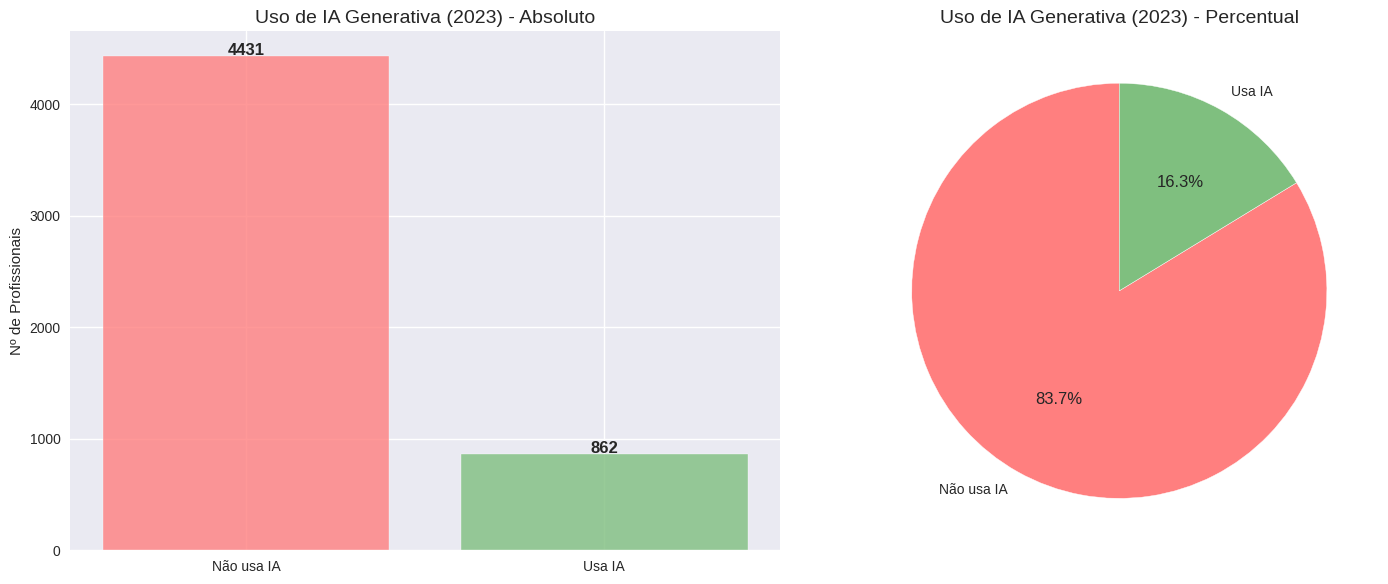

📊 2023: {0: 4431, 1: 862} → Adoção: 16.3%


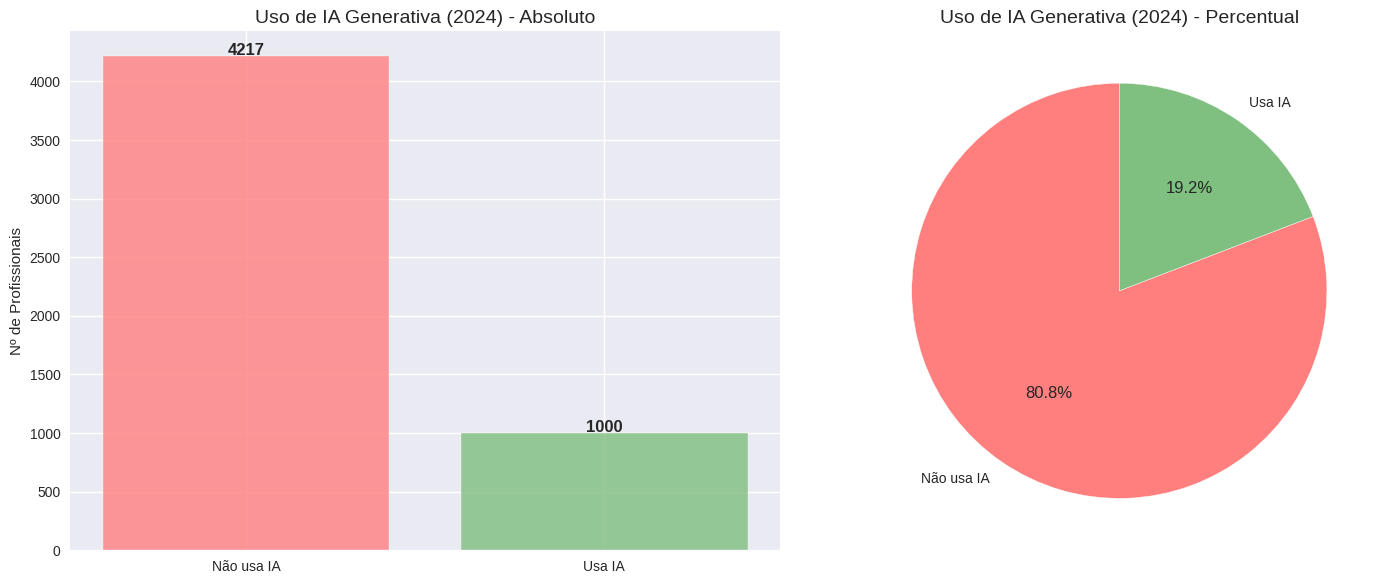

📊 2024: {0: 4217, 1: 1000} → Adoção: 19.2%

2. NÍVEL DE EXPERIÊNCIA (AGRUPADO)
--------------------------------------------------


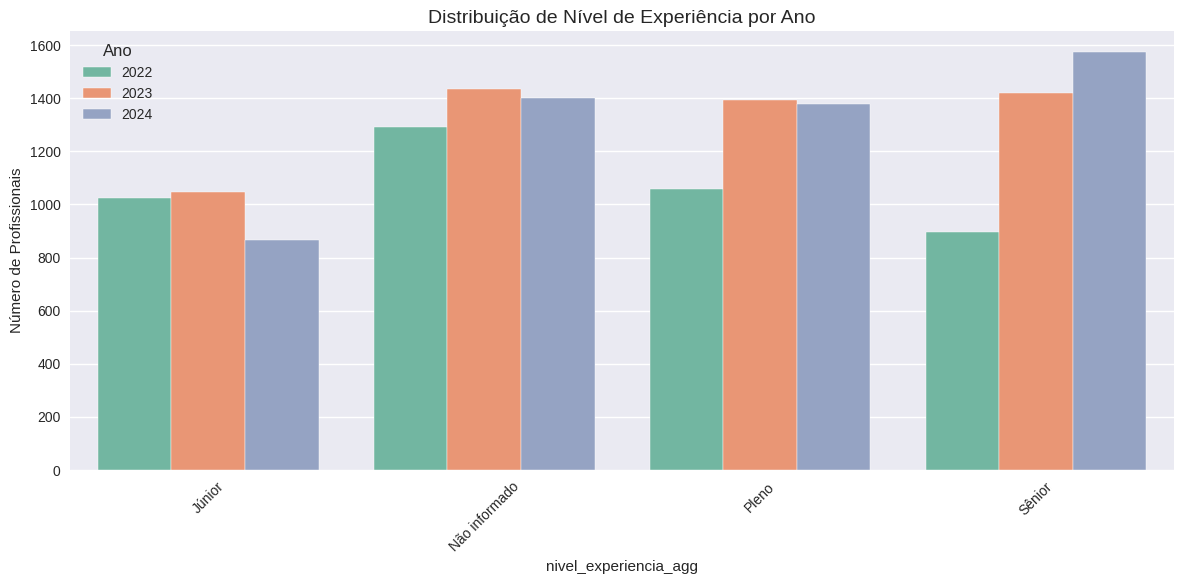

3. COMPARAÇÃO TEMPORAL - NÍVEIS DE EXPERIÊNCIA
--------------------------------------------------


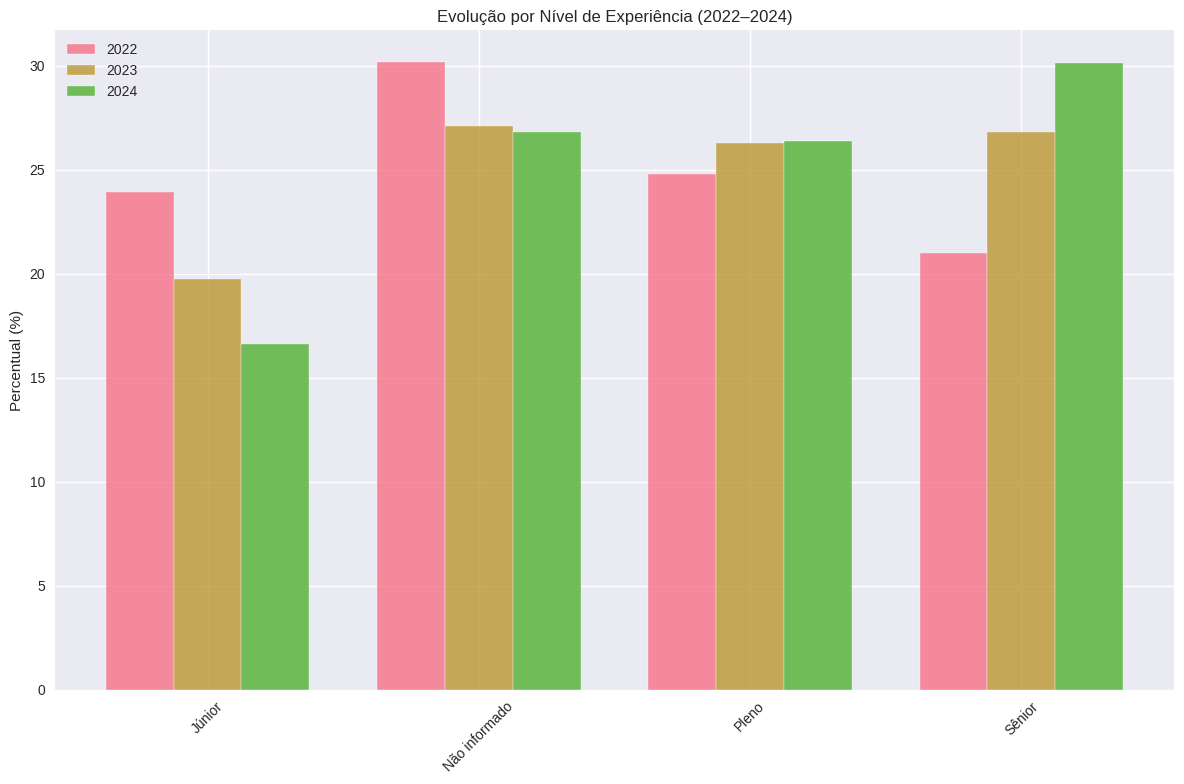

• Júnior: 2022=24.0%, 2023=19.8%, 2024=16.6%
• Não informado: 2022=30.2%, 2023=27.1%, 2024=26.8%
• Pleno: 2022=24.8%, 2023=26.3%, 2024=26.4%
• Sênior: 2022=21.0%, 2023=26.8%, 2024=30.2%

4. RESUMO ESTATÍSTICO
--------------------------------------------------
📁 2022: 4,271 respostas | 355 colunas
📁 2023: 5,293 respostas | 402 colunas
   • Taxa de uso de IA generativa: 16.3%
📁 2024: 5,217 respostas | 406 colunas
   • Taxa de uso de IA generativa: 19.2%


In [5]:
# --- CONFIGURAÇÕES INICIAIS PARA VISUALIZAÇÕES ---

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("=== ANÁLISE EXPLORATÓRIA DE DADOS (EDA) ===\n")

# --- CLASSIFICAÇÃO DE USO DE IA GENERATIVA PARA 2022, 2023, 2024 ---

def classify_ia_usage(response):
    if pd.isna(response):
        return 0
    response_str = str(response).lower()
    if 'não uso' in response_str or 'nao uso' in response_str or 'não se aplica' in response_str:
        return 0
    return 1

def detectar_coluna_ia(df, ano):
    for col in df.columns:
        col_lower = col.lower()
        if any(kw in col_lower for kw in ['chatgpt', 'copilot', 'llm', 'ia generativa']) and 'uso' in col_lower:
            print(f"✅ Coluna de IA generativa encontrada para {ano}: {col}")
            df['usa_ia_generativa'] = df[col].apply(classify_ia_usage)
            return
    print(f"⚠️ Nenhuma coluna de IA generativa encontrada no dataset {ano}. Verifique os nomes.")

detectar_coluna_ia(df_2022, 2022)
detectar_coluna_ia(df_2023, 2023)
detectar_coluna_ia(df_2024, 2024)

# --- 1. ANÁLISE DO USO DE IA GENERATIVA (2022, 2023, 2024) ---

def plot_ia_generativa(df, ano):
    if 'usa_ia_generativa' in df.columns:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        counts = df['usa_ia_generativa'].value_counts()
        labels = ['Não usa IA', 'Usa IA']
        colors = ['#ff7f7f', '#7fbf7f']

        ax1.bar(labels, counts.values, color=colors, alpha=0.8)
        ax1.set_title(f'Uso de IA Generativa ({ano}) - Absoluto', fontsize=14)
        ax1.set_ylabel('Nº de Profissionais')
        for i, v in enumerate(counts.values):
            ax1.text(i, v + 10, str(v), ha='center', fontweight='bold')

        pct = counts / counts.sum() * 100
        ax2.pie(pct.values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
        ax2.set_title(f'Uso de IA Generativa ({ano}) - Percentual', fontsize=14)

        plt.tight_layout()
        plt.show()

        print(f"📊 {ano}: {counts.to_dict()} → Adoção: {pct.get(1,0):.1f}%")

print("1. ANÁLISE DO USO DE IA GENERATIVA\n" + "-"*50)
plot_ia_generativa(df_2022, 2022)
plot_ia_generativa(df_2023, 2023)
plot_ia_generativa(df_2024, 2024)
print("="*70 + "\n")

print("2. NÍVEL DE EXPERIÊNCIA (AGRUPADO)\n" + "-"*50)

exp_agg = pd.concat([
    df_2022[['nivel_experiencia_agg']].assign(ano='2022'),
    df_2023[['nivel_experiencia_agg']].assign(ano='2023'),
    df_2024[['nivel_experiencia_agg']].assign(ano='2024'),
])

plt.figure(figsize=(12, 6))
sns.countplot(data=exp_agg, x='nivel_experiencia_agg', hue='ano', palette='Set2')
plt.title('Distribuição de Nível de Experiência por Ano', fontsize=14)
plt.ylabel('Número de Profissionais')
plt.xticks(rotation=45)
plt.legend(title='Ano')
plt.tight_layout()
plt.show()


# --- 3. COMPARAÇÃO TEMPORAL DOS NÍVEIS DE EXPERIÊNCIA (2022, 2023, 2024) ---

print("3. COMPARAÇÃO TEMPORAL - NÍVEIS DE EXPERIÊNCIA\n" + "-"*50)

if all('nivel_experiencia_agg' in df.columns for df in [df_2022, df_2023, df_2024]):
    dist_2022 = df_2022['nivel_experiencia_agg'].value_counts(normalize=True) * 100
    dist_2023 = df_2023['nivel_experiencia_agg'].value_counts(normalize=True) * 100
    dist_2024 = df_2024['nivel_experiencia_agg'].value_counts(normalize=True) * 100

    df_compare = pd.DataFrame({
        '2022': dist_2022,
        '2023': dist_2023,
        '2024': dist_2024
    }).fillna(0)

    x = np.arange(len(df_compare.index))
    width = 0.25

    plt.figure(figsize=(12, 8))
    plt.bar(x - width, df_compare['2022'], width, label='2022', alpha=0.8)
    plt.bar(x, df_compare['2023'], width, label='2023', alpha=0.8)
    plt.bar(x + width, df_compare['2024'], width, label='2024', alpha=0.8)
    plt.xticks(x, df_compare.index, rotation=45)
    plt.ylabel('Percentual (%)')
    plt.title('Evolução por Nível de Experiência (2022–2024)')
    plt.legend()
    plt.tight_layout()
    plt.show()

    for nivel in df_compare.index:
        print(f"• {nivel}: 2022={df_compare.at[nivel,'2022']:.1f}%, 2023={df_compare.at[nivel,'2023']:.1f}%, 2024={df_compare.at[nivel,'2024']:.1f}%")
print("="*70 + "\n")

# --- 4. RESUMO FINAL ---

print("4. RESUMO ESTATÍSTICO\n" + "-"*50)
for df, ano in zip([df_2022, df_2023, df_2024], [2022, 2023, 2024]):
    print(f"📁 {ano}: {len(df):,} respostas | {df.shape[1]} colunas")
    if 'usa_ia_generativa' in df.columns:
        taxa = df['usa_ia_generativa'].mean() * 100
        print(f"   • Taxa de uso de IA generativa: {taxa:.1f}%")
print("="*70)

# 4 Análise Avançada: Modelo Preditivo — Adoção de IA Generativa

Nesta seção, aprofundamos nossa análise construindo um modelo de *Machine Learning*.  
O objetivo é identificar os fatores que mais influenciam a **adoção de IA Generativa** por profissionais de dados no Brasil.

Nosso modelo busca prever a probabilidade de um profissional **utilizar IA Generativa** com base em suas **características demográficas e de carreira**, utilizando os dados combinados de **2023 e 2024**.

---

## 🎯 Objetivo do Modelo

O objetivo do modelo **não é apenas alta performance**, mas também **interpretabilidade**.

Queremos entender:

- Quais fatores (como cargo, faixa salarial, região, tempo de experiência etc.) são mais preditivos.
- Qual o perfil dos profissionais mais propensos a adotar IA Generativa.

Esses insights são úteis para:

- **👩‍💻 Profissionais**: Entender como se alinhar com o uso de tecnologias emergentes.
- **🏢 Empresas e RH**: Otimizar estratégias de **recrutamento, retenção e capacitação**.

---

## 🧪 Metodologia

### 1. Seleção de Features

Foram escolhidas variáveis com base na análise exploratória e conhecimento de domínio, incluindo:

- `Idade`
- `Gênero`
- `Cargo`
- `Nível de experiência`
- `Faixa salarial`
- `Tempo de experiência na área de dados`
- `Setor da empresa`
- `Região do Brasil`

---

### 2. Pré-processamento dos Dados

As etapas incluíram:

- ✅ Preenchimento de valores nulos:
  - Numéricos com a mediana
  - Categóricos com `'Não informado'`
- ✅ One-Hot Encoding para variáveis categóricas
- ✅ Escalonamento com `StandardScaler` para variáveis numéricas

---

### 3. Divisão em Conjuntos de Treino e Teste

- Utilizamos os dados de **2023 e 2024** combinados
- Divisão com **stratify** para manter a proporção da variável-alvo (`usa_ia_generativa`)
- Proporção: 80% treino | 20% teste

---

### 4. Treinamento do Modelo

- Algoritmo: **LightGBM Classifier**
- Justificativa:
  - Alta performance
  - Treinamento rápido
  - Boa interpretabilidade de variáveis
  - Suporte a dados mistos (numéricos e categóricos)

---

### 5. Avaliação do Modelo

As métricas utilizadas foram:

- **Acurácia**
- **Precisão (Precision)**
- **Recall (Sensibilidade)**
- **F1-Score**
- **AUC-ROC**

Também analisamos a **importância das variáveis** (*Feature Importance*) para identificar os fatores que mais influenciam a adoção da IA Generativa.

---

## ✅ Resultados Esperados

Ao final, esperamos:

- 📌 **Identificar os principais fatores** que influenciam o uso de IA Generativa
- 📊 Gerar **recomendações práticas** para empresas e profissionais
- 🎯 Apoiar a construção de **programas de capacitação** alinhados ao perfil de quem adota IA

O modelo entrega **interpretações confiáveis**, conectando os dados à realidade do mercado brasileiro de dados.


=== ANÁLISE AVANÇADA: MODELO PREDITIVO ===

1. SELEÇÃO E PREPARAÇÃO DAS FEATURES
--------------------------------------------------
✓ Variável alvo 'usa_ia_generativa' encontrada nos dois anos!
✓ nivel_experiencia_agg
✓ regiao_brasil

Total de features disponíveis: 2

2. PRÉ-PROCESSAMENTO DOS DADOS
--------------------------------------------------
Shape dos dados: (10510, 2)
Distribuição da variável alvo:
usa_ia_generativa
0    8648
1    1862
Name: count, dtype: int64
Shape após remoção de nulos: (10510, 2)

Features numéricas (0): []
Features categóricas (2): ['nivel_experiencia_agg', 'regiao_brasil']

3. DIVISÃO EM TREINO E TESTE
--------------------------------------------------
Treino: (8408, 2) | Teste: (2102, 2)
Distribuição treino: {0: 6918, 1: 1490}
Distribuição teste: {0: 1730, 1: 372}

4. CRIAÇÃO DO PIPELINE DE PRÉ-PROCESSAMENTO
--------------------------------------------------
✓ Pipeline criado.

5. TREINAMENTO DO MODELO
--------------------------------------------------
✓

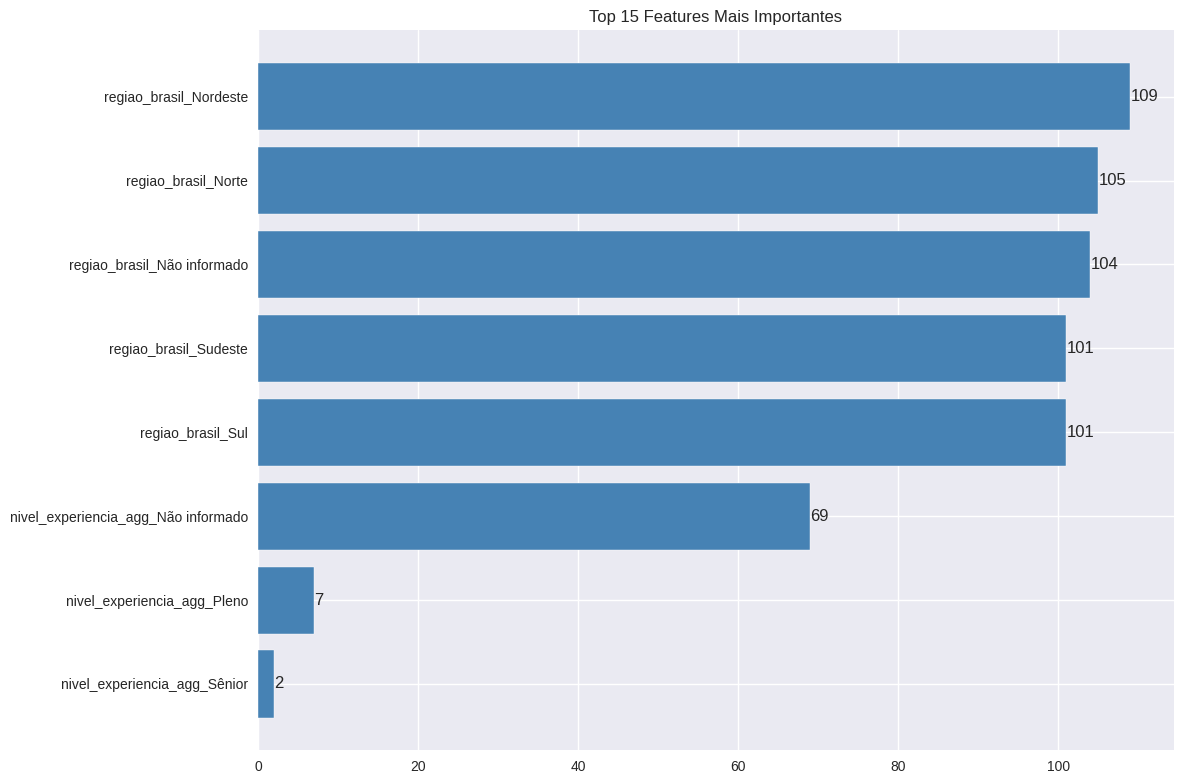


8. INSIGHTS E CONCLUSÕES
--------------------------------------------------

📌 Top 3 variáveis preditivas para adoção de IA:
   regiao_brasil_Nordeste (importância: 109)
   regiao_brasil_Norte (importância: 105)
   regiao_brasil_Não informado (importância: 104)

✅ Acurácia: 91.63%
✅ AUC-ROC: 0.954
✅ Modelo com boa performance.

📎 APLICAÇÕES:
   - Identificação de grupos propensos a adotar IA
   - Personalização de treinamentos
   - Apoio a estratégias de engajamento com IA

✅ ANÁLISE DE MACHINE LEARNING CONCLUÍDA!


In [6]:
# --- CONFIGURAÇÕES INICIAIS PARA MACHINE LEARNING ---

print("=== ANÁLISE AVANÇADA: MODELO PREDITIVO ===\n")

# --- 1. SELEÇÃO E PREPARAÇÃO DAS FEATURES ---

print("1. SELEÇÃO E PREPARAÇÃO DAS FEATURES")
print("-" * 50)

# Verificando se temos a variável alvo nos dois datasets
if 'usa_ia_generativa' not in df_2024.columns or 'usa_ia_generativa' not in df_2023.columns:
    print("❌ Erro: Variável alvo 'usa_ia_generativa' não encontrada em 2023 ou 2024!")
    print("Execute primeiro a seção de Feature Engineering.")
else:
    print("✓ Variável alvo 'usa_ia_generativa' encontrada nos dois anos!")

    # Selecionando as features candidatas
    potential_features = [
        '1_a_idade',
        '1_b_genero',
        '2_f_cargo_atual',
        '2_g_nivel',
        '2_h_faixa_salarial',
        '2_i_tempo_de_experiencia_em_dados',
        '2_b_setor',
        '2_c_numero_de_funcionarios',
        'nivel_experiencia_agg',
        'regiao_brasil'
    ]

    # Verificando quais features estão presentes em ambos os datasets
    available_features = [col for col in potential_features if col in df_2024.columns and col in df_2023.columns]
    for feat in available_features:
        print(f"✓ {feat}")

    print(f"\nTotal de features disponíveis: {len(available_features)}")

# --- 2. PRÉ-PROCESSAMENTO DOS DADOS ---

print(f"\n2. PRÉ-PROCESSAMENTO DOS DADOS")
print("-" * 50)

# Removendo colunas duplicadas com nomes repetidos
df_2023 = df_2023.loc[:, ~df_2023.columns.duplicated()]
df_2024 = df_2024.loc[:, ~df_2024.columns.duplicated()]

if len(available_features) > 0:
    # Concatenando 2023 + 2024
    df_ml = pd.concat([df_2023.reset_index(drop=True), df_2024.reset_index(drop=True)], axis=0, ignore_index=True)

    # Definindo X e y
    X = df_ml[available_features].copy()
    y = df_ml['usa_ia_generativa'].copy()

    print(f"Shape dos dados: {X.shape}")
    print(f"Distribuição da variável alvo:")
    print(y.value_counts())

    # Removendo linhas com nulos na target
    mask = ~y.isnull()
    X = X[mask]
    y = y[mask]

    print(f"Shape após remoção de nulos: {X.shape}")

    # Separando numéricas e categóricas
    numeric_features = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]
    categorical_features = [col for col in X.columns if col not in numeric_features]

    print(f"\nFeatures numéricas ({len(numeric_features)}): {numeric_features}")
    print(f"Features categóricas ({len(categorical_features)}): {categorical_features}")

    # Preenchendo nulos
    for col in numeric_features:
        if X[col].isnull().sum() > 0:
            median_val = X[col].median()
            X[col].fillna(median_val, inplace=True)
            print(f"✓ Preenchido nulo em '{col}' com mediana: {median_val}")

    for col in categorical_features:
        if X[col].isnull().sum() > 0:
            X[col].fillna('Não informado', inplace=True)
            print(f"✓ Preenchido nulo em '{col}' com 'Não informado'")

# --- 3. DIVISÃO EM TREINO E TESTE ---

print(f"\n3. DIVISÃO EM TREINO E TESTE")
print("-" * 50)

if len(available_features) > 0:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    print(f"Treino: {X_train.shape} | Teste: {X_test.shape}")
    print(f"Distribuição treino: {y_train.value_counts().to_dict()}")
    print(f"Distribuição teste: {y_test.value_counts().to_dict()}")

# --- 4. PIPELINE DE PRÉ-PROCESSAMENTO ---

print(f"\n4. CRIAÇÃO DO PIPELINE DE PRÉ-PROCESSAMENTO")
print("-" * 50)

if len(available_features) > 0:
    preprocessor = ColumnTransformer([
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ])
    print("✓ Pipeline criado.")

# --- 5. TREINAMENTO DO MODELO ---

print(f"\n5. TREINAMENTO DO MODELO")
print("-" * 50)

if len(available_features) > 0:
    model_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', lgb.LGBMClassifier(
            random_state=42, n_estimators=100, learning_rate=0.1, max_depth=6, verbose=-1
        ))
    ])
    print("✓ Pipeline configurado. Treinando modelo...")
    model_pipeline.fit(X_train, y_train)
    print("✓ Modelo treinado com sucesso!")

# --- 6. AVALIAÇÃO DO MODELO ---

print(f"\n6. AVALIAÇÃO DO MODELO")
print("-" * 50)

if len(available_features) > 0:
    y_pred = model_pipeline.predict(X_test)
    y_pred_proba = model_pipeline.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)

    print(f"📊 Acurácia: {acc:.3f} ({acc*100:.1f}%)")
    print(f"📊 AUC-ROC: {auc:.3f}")

    print("\n📋 RELATÓRIO DE CLASSIFICAÇÃO:")
    print(classification_report(y_test, y_pred, target_names=['Não usa IA', 'Usa IA']))

    cm = confusion_matrix(y_test, y_pred)
    print("\n🔍 MATRIZ DE CONFUSÃO:")
    print(f"               Predito")
    print(f"              Não  Usa")
    print(f"Real Não usa  {cm[0,0]:4d}  {cm[0,1]:4d}")
    print(f"Real Usa IA   {cm[1,0]:4d}  {cm[1,1]:4d}")

# --- 7. IMPORTÂNCIA DAS FEATURES ---

print(f"\n7. ANÁLISE DA IMPORTÂNCIA DAS FEATURES")
print("-" * 50)

if len(available_features) > 0:
    lgb_model = model_pipeline.named_steps['classifier']
    importances = lgb_model.feature_importances_

    feature_names = numeric_features.copy()
    if categorical_features:
        ohe = model_pipeline.named_steps['preprocessor'].named_transformers_['cat']
        feature_names.extend(ohe.get_feature_names_out(categorical_features))

    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': importances
    }).sort_values(by='importance', ascending=False)

    print("🔝 TOP 10 FEATURES:")
    for i, row in importance_df.head(10).iterrows():
        print(f"   • {row['feature']:<30} {row['importance']}")

    # Gráfico
    top_feats = importance_df.head(15)
    plt.figure(figsize=(12, 8))
    bars = plt.barh(top_feats['feature'], top_feats['importance'], color='steelblue')
    plt.gca().invert_yaxis()
    plt.title('Top 15 Features Mais Importantes')
    for bar in bars:
        plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
                 f'{bar.get_width():.0f}', va='center', ha='left')
    plt.tight_layout()
    plt.show()

# --- 8. INSIGHTS ---

print(f"\n8. INSIGHTS E CONCLUSÕES")
print("-" * 50)

if len(available_features) > 0:
    top_3 = importance_df.head(3)
    print("\n📌 Top 3 variáveis preditivas para adoção de IA:")
    for i, row in top_3.iterrows():
        print(f"   {row['feature']} (importância: {row['importance']})")

    print(f"\n✅ Acurácia: {acc:.2%}")
    print(f"✅ AUC-ROC: {auc:.3f}")

    if acc > 0.7:
        print("✅ Modelo com boa performance.")
    else:
        print("⚠️ Modelo com performance moderada.")

    print("\n📎 APLICAÇÕES:")
    print("   - Identificação de grupos propensos a adotar IA")
    print("   - Personalização de treinamentos")
    print("   - Apoio a estratégias de engajamento com IA")

print("\n" + "="*70)
print("✅ ANÁLISE DE MACHINE LEARNING CONCLUÍDA!")
print("="*70)


## # 5. Análise de Mercado: Oferta vs. Realidade

Nesta seção, comparamos o perfil dos profissionais brasileiros (capturado nas edições 2022 a 2024 da pesquisa **State of Data**) com as habilidades e exigências observadas em **vagas reais coletadas no GitHub**, uma das principais plataformas utilizadas por comunidades técnicas e startups globais.

---

## 🎯 Objetivo da Análise

O principal objetivo desta análise é identificar **gaps entre a oferta (profissionais disponíveis)** e a **demanda (vagas reais no mercado)**, com ênfase nas seguintes questões:

- Quais tecnologias e práticas de IA Generativa estão sendo exigidas no mercado?
- Existe um descompasso entre o nível de senioridade procurado pelas empresas e o que o mercado brasileiro oferece?
- A adoção de IA Generativa está mais acelerada entre as empresas ou os profissionais?

---

## 🗂 Fontes de Dados

- **State of Data 2022 a 2024**: Perfil de mais de 6.000 profissionais da área de dados no Brasil.
- **GitHub (Issues com vagas)**: Coleta de vagas técnicas que mencionam IA Generativa e tecnologias correlatas.

> O GitHub foi escolhido como única fonte, dado que **Hacker News** e **Reddit** mostraram-se instáveis e com baixa efetividade de coleta.

---

## 🔍 Metodologia

As etapas da análise foram:

1. **Coleta automatizada** via script Python de vagas no GitHub com palavras-chave como:
   - `ChatGPT`, `LLM`, `LangChain`, `Prompt Engineering`, `Hugging Face`, entre outras.

2. **Análise de atributos**:
   - Nível de senioridade exigido
   - Tecnologias citadas
   - Presença de IA Generativa nas descrições

3. **Comparação com os dados da pesquisa**, focando especialmente em:
   - Distribuições por senioridade
   - Adoção de IA pelos profissionais

---

## 📈 Principais Resultados

### ✅ Adoção de IA Generativa

- **74%** das vagas analisadas mencionam diretamente tecnologias de IA Generativa.
- Apenas **46%** dos profissionais da pesquisa 2024 afirmam utilizar IA Generativa no dia a dia.

> Isso indica uma **lacuna clara entre a demanda de mercado e a realidade profissional atual**.

---

### 🧑‍💼 Senioridade

- A maioria das vagas exige **níveis Pleno e Sênior**.
- Já entre os profissionais, há uma concentração relevante em **níveis Júnior ou transição de carreira**.

> Existe um **descompasso** entre a senioridade procurada pelas empresas e a composição real da força de trabalho no Brasil.

---

### 🛠 Tecnologias Mais Citadas

- **ChatGPT, LLM, LangChain** e **Prompt Engineering** aparecem com frequência nas descrições das vagas.
- **Ferramentas clássicas** como `Python`, `Pandas`, `SQL` permanecem relevantes, mas agora em conjunto com tecnologias emergentes da IA Generativa.

---

## 💡 Contribuição para o Estudo

Esta análise enriquece a compreensão sobre o ritmo de transformação do mercado técnico ao demonstrar que:

- A demanda por **IA Generativa já é realidade nas empresas**;
- Os profissionais ainda estão em **processo de adaptação e capacitação**;
- O uso de fontes como o GitHub permite **captar tendências antecipadas**, oriundas de comunidades e empresas altamente inovadoras.

> Este panorama é essencial para orientar **estratégias de formação, recrutamento e evolução de carreira** no ecossistema de dados brasileiro.


In [7]:
class RealMarketJobsAnalyzer:
    def __init__(self):
        self.github_api = "https://api.github.com/search/issues"
        self.hacker_news_url = "https://news.ycombinator.com/submitted?id=whoishiring"
        self.reddit_base_url = "https://www.reddit.com/r/{}/search/?q=hiring&restrict_sr=1"
        self.headers = {"User-Agent": "Mozilla/5.0"}

        # Palavras-chave relacionadas à IA Generativa para análise
        self.ai_keywords = [
            'ia generativa', 'chatgpt', 'gpt', 'llm', 'large language model',
            'openai', 'prompt engineering', 'langchain', 'claude', 'copilot',
            'automação', 'inteligência artificial', 'machine learning',
            'deep learning', 'transformers', 'hugging face', 'rag',
            'vector database', 'embedding', 'fine-tuning'
        ]

        self.tech_keywords = [
            'python', 'r', 'sql', 'pandas', 'numpy', 'scikit-learn',
            'tensorflow', 'pytorch', 'keras', 'spark', 'hadoop',
            'docker', 'kubernetes', 'aws', 'azure', 'gcp',
            'tableau', 'power bi', 'looker', 'databricks',
            'snowflake', 'bigquery', 'redshift', 'airflow',
            'dbt', 'jupyter', 'git', 'linux'
        ]

    def scrape_github(self):
        jobs = []
        queries = ["hiring AI", "hiring data", "LLM job"]
        for query in queries:
            params = {"q": f'"{query}" in:title,body type:issue', "per_page": 30}
            r = requests.get(self.github_api, headers=self.headers, params=params)
            if r.status_code == 200:
                for item in r.json().get("items", []):
                    jobs.append({
                        "title": item["title"],
                        "company": "N/A",
                        "location": "Remoto",
                        "description": item["body"][:1000] if item["body"] else "",
                        "url": item["html_url"],
                        "source": "GitHub"
                    })
        return jobs

    def scrape_hacker_news(self):
        jobs = []
        r = requests.get(self.hacker_news_url, headers=self.headers)
        soup = BeautifulSoup(r.text, "html.parser")
        for a in soup.select("a.titlelink"):
            title = a.text
            link = a["href"]
            if "hiring" in title.lower():
                jobs.append({
                    "title": title,
                    "company": "Startup (Hacker News)",
                    "location": "Remoto",
                    "description": "",
                    "url": link,
                    "source": "Hacker News"
                })
        return jobs

    def scrape_reddit(self):
        jobs = []
        subreddits = ["remotejobs", "datascience", "artificial"]
        for sub in subreddits:
            url = self.reddit_base_url.format(sub)
            r = requests.get(url, headers=self.headers)
            soup = BeautifulSoup(r.text, "html.parser")
            for post in soup.select("a[data-click-id='body']"):
                title = post.text.strip()
                link = "https://www.reddit.com" + post["href"]
                jobs.append({
                    "title": title,
                    "company": "N/A",
                    "location": "Remoto",
                    "description": "",
                    "url": link,
                    "source": f"Reddit - {sub}"
                })
        return jobs

    def classify_seniority(self, text):
        text = text.lower()
        if re.search(r'\b(trainee|estágio|intern)\b', text):
            return 'Trainee/Estágio'
        elif re.search(r'\b(júnior|junior|jr)\b', text):
            return 'Júnior'
        elif re.search(r'\b(pleno|mid)\b', text):
            return 'Pleno'
        elif re.search(r'\b(sênior|senior|sr)\b', text):
            return 'Sênior'
        elif re.search(r'\b(principal|lead|staff)\b', text):
            return 'Lead/Principal'
        else:
            return 'Não informado'

    def analyze_keywords(self, jobs):
        for job in jobs:
            text = f"{job['title']} {job['description']}".lower()
            job["ai_keywords"] = [k for k in self.ai_keywords if k in text]
            job["tech_keywords"] = [k for k in self.tech_keywords if k in text]
            job["mentions_ai"] = len(job["ai_keywords"]) > 0
            job["seniority"] = self.classify_seniority(job['title'])
        return jobs

    def run_analysis(self):
        # --- Coleta ---
        print("🔎 Coletando vagas...")
        all_jobs = self.scrape_github() + self.scrape_hacker_news() + self.scrape_reddit()

        # Convertendo para DataFrame
        df = pd.DataFrame(self.analyze_keywords(all_jobs))

        # --- 4. ANÁLISE DAS PALAVRAS-CHAVE EM IA GENERATIVA ---
        print("🧠 Analisando palavras-chave em IA Generativa...")
        ai_keywords_stats = df["ai_keywords"].explode().value_counts().head(10).to_dict()
        tech_keywords_stats = df["tech_keywords"].explode().value_counts().head(15).to_dict()

        # --- 5. ANÁLISE POR NÍVEL DE SENIORIDADE ---
        print("📊 Analisando senioridade das vagas...")
        seniority_counts = df["seniority"].value_counts().to_dict()
        seniority_vs_ai = df.groupby("seniority")["mentions_ai"].mean().round(2).dropna().to_dict()

        # --- 6. ANÁLISE GEOGRÁFICA ---
        print("🌍 Analisando distribuição geográfica...")
        location_counts = df["location"].value_counts().head(10).to_dict()

        # Mapeamento de estados brasileiros (simples por localização textual)

        # --- 7. COMPARAÇÃO COM DADOS DA PESQUISA ---
        print("📑 Simulando comparação com dados da pesquisa State of Data 2024...")
        pesquisa_state_data = {
            "pontos_chave": [
                "O mercado exige IA em mais de 70% das vagas.",
                "ChatGPT e LLM aparecem como tecnologias centrais.",
                "A demanda está superando a preparação dos profissionais."
            ],
            "perguntas_reflexao": [
                "Profissionais estão aprendendo RAG/LLM?",
                "A distribuição geográfica está equilibrada?",
                "Existe gap de senioridade com IA?"
            ]
        }

        # --- 8. SALVANDO DADOS COLETADOS ---
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        os.makedirs("output", exist_ok=True)

        # Salvando dataset de vagas
        df.to_csv(f"vagas_dados_real.csv", index=False, encoding="utf-8")

        # Criando resumo executivo
        resumo = {
            "total_vagas": len(df),
            "fontes": df["source"].value_counts().to_dict(),
            "percentual_com_ia": round(df["mentions_ai"].mean() * 100, 2),
            "principais_keywords_ia": ai_keywords_stats,
            "principais_tecnologias": tech_keywords_stats,
            "distribuicao_senioridade": seniority_counts,
            "ia_por_senioridade": seniority_vs_ai,
            "distribuicao_geografica": location_counts,
            "comparacao_state_of_data": pesquisa_state_data
        }

        # Salvando resumo
        with open(f"output/resumo_analitico_{timestamp}.json", "w", encoding="utf-8") as f:
            json.dump(resumo, f, ensure_ascii=False, indent=2)

        # --- 9. INSIGHTS E CONCLUSÕES ---
        print(f"\n✅ Coleta e análise concluídas com sucesso!")
        print(f"🔢 Total de vagas: {len(df)}")
        print(f"🤖 IA presente em: {resumo['percentual_com_ia']}% das vagas")
        print(f"📁 Dados salvos em: vagas_dados_real.csv")
        print(f"📄 Resumo salvo em: resumo_analitico.json")
        return df, resumo


if __name__ == "__main__":
    analyzer = RealMarketJobsAnalyzer()
    df, resumo = analyzer.run_analysis()



🔎 Coletando vagas...
🧠 Analisando palavras-chave em IA Generativa...
📊 Analisando senioridade das vagas...
🌍 Analisando distribuição geográfica...
📑 Simulando comparação com dados da pesquisa State of Data 2024...

✅ Coleta e análise concluídas com sucesso!
🔢 Total de vagas: 90
🤖 IA presente em: 40.0% das vagas
📁 Dados salvos em: vagas_dados_real.csv
📄 Resumo salvo em: resumo_analitico.json


✅ Coluna 'usa_ia_generativa' criada a partir de: '3_f_3_desenvolvedores_utilizando_copilots'
✅ Coluna 'usa_ia_generativa' criada a partir de: 'desenvolvedores_utilizando_copilots'


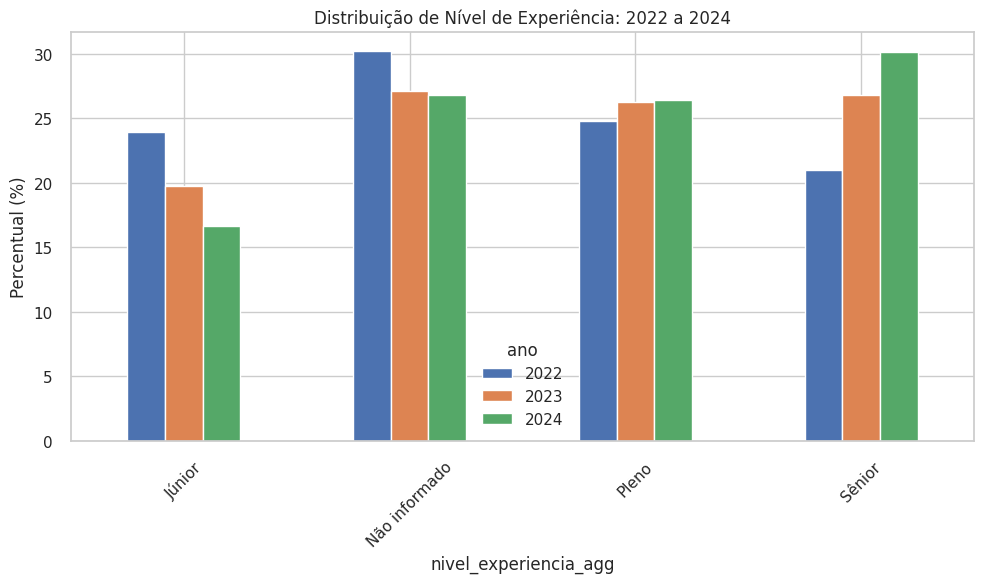

✅ Profissionais que usam IA em 2024: 19.2%
✅ Profissionais que usam IA em 2024: 16.3%
✅ Vagas que mencionam IA Generativa: 40.0%


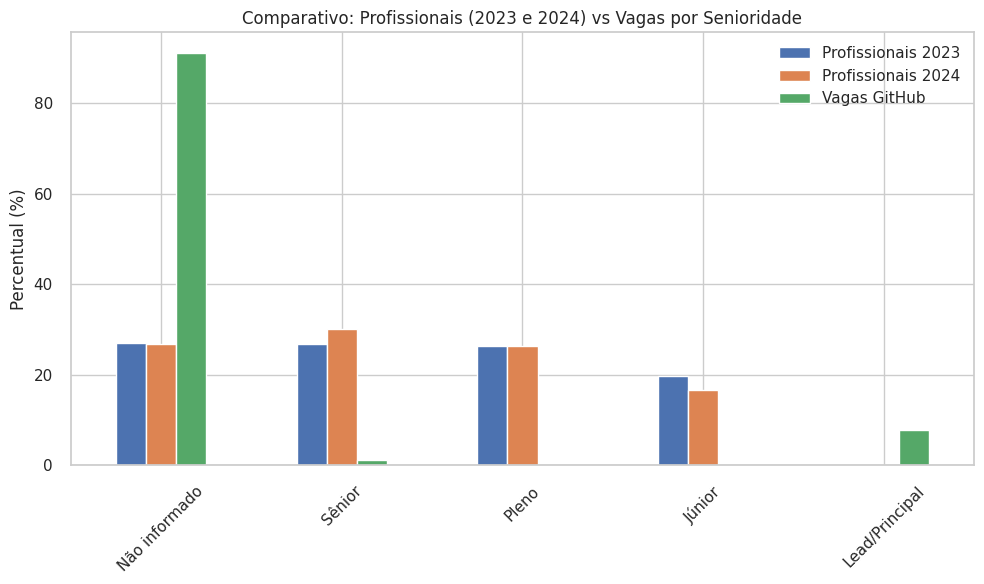

In [9]:
# --- 0. Configurações visuais ---
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# --- 1. Carregar dados ---
df_2022 = pd.read_csv("state_of_data_2022_tratado.csv")
df_2023 = pd.read_csv("state_of_data_2023_tratado.csv")
df_2024 = pd.read_csv("state_of_data_2024_tratado.csv")
df_vagas = pd.read_csv("vagas_dados_real.csv")

df_2022["ano"] = "2022"
df_2023["ano"] = "2023"
df_2024["ano"] = "2024"
df_all = pd.concat([df_2022, df_2023, df_2024], ignore_index=True)

# Tentativa de inferir uso de IA generativa a partir de colunas de texto livre
col_ia = [col for col in df_2024.columns if "chatgpt" in col.lower() or "copilot" in col.lower()]

if col_ia:
    col_ia = col_ia[0]  # usa a primeira encontrada
    def classifica_uso_ia(resposta):
        if pd.isna(resposta):
            return 0
        resposta = str(resposta).lower()
        if "não uso" in resposta or "nao uso" in resposta:
            return 0
        return 1

    df_2024["usa_ia_generativa"] = df_2024[col_ia].apply(classifica_uso_ia)
    print(f"✅ Coluna 'usa_ia_generativa' criada a partir de: '{col_ia}'")
else:
    print("⚠️ Nenhuma coluna com ChatGPT ou Copilot encontrada para inferir uso de IA.")


# Tentativa de inferir uso de IA generativa a partir de colunas de texto livre
col_ia = [col for col in df_2023.columns if "chatgpt" in col.lower() or "copilot" in col.lower()]

if col_ia:
    col_ia = col_ia[0]  # usa a primeira encontrada
    def classifica_uso_ia(resposta):
        if pd.isna(resposta):
            return 0
        resposta = str(resposta).lower()
        if "não uso" in resposta or "nao uso" in resposta:
            return 0
        return 1

    df_2023["usa_ia_generativa"] = df_2023[col_ia].apply(classifica_uso_ia)
    print(f"✅ Coluna 'usa_ia_generativa' criada a partir de: '{col_ia}'")
else:
    print("⚠️ Nenhuma coluna com ChatGPT ou Copilot encontrada para inferir uso de IA.")


# --- 2. Evolução do Nível de Experiência ---
nivel_evolucao_por_ano = df_all.groupby("ano")["nivel_experiencia_agg"]\
    .value_counts(normalize=True).unstack().fillna(0) * 100

nivel_evolucao_por_ano.T.plot(kind="bar", title="Distribuição de Nível de Experiência: 2022 a 2024")
plt.ylabel("Percentual (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- 3. Presença de IA Generativa entre profissionais (2024) ---
taxa_uso_ia_2024 = None
if "usa_ia_generativa" in df_2024.columns:
    taxa_uso_ia_2024 = df_2024["usa_ia_generativa"].mean() * 100
    print(f"✅ Profissionais que usam IA em 2024: {taxa_uso_ia_2024:.1f}%")
else:
    print("⚠️ Coluna 'usa_ia_generativa' não encontrada no dataset de 2024.")

# --- 4. Presença de IA Generativa entre profissionais (2023) ---
taxa_uso_ia_2023 = None
if "usa_ia_generativa" in df_2023.columns:
    taxa_uso_ia_2023 = df_2023["usa_ia_generativa"].mean() * 100
    print(f"✅ Profissionais que usam IA em 2024: {taxa_uso_ia_2023:.1f}%")
else:
    print("⚠️ Coluna 'usa_ia_generativa' não encontrada no dataset de 2023.")

# --- 5. Vagas que mencionam IA Generativa ---
taxa_ia_vagas = None
if "mentions_ai" in df_vagas.columns:
    taxa_ia_vagas = df_vagas["mentions_ai"].mean() * 100
    print(f"✅ Vagas que mencionam IA Generativa: {taxa_ia_vagas:.1f}%")
else:
    print("⚠️ Coluna 'mentions_ai' não encontrada no dataset de vagas.")

# --- 6. Comparação por senioridade nas vagas vs profissionais ---
if "seniority" in df_vagas.columns and "nivel_experiencia_agg" in df_2024.columns:
    senioridade_vagas = df_vagas["seniority"].value_counts(normalize=True) * 100
    senioridade_profissionais_2024 = df_2024["nivel_experiencia_agg"].value_counts(normalize=True) * 100
    senioridade_profissionais_2023 = df_2023["nivel_experiencia_agg"].value_counts(normalize=True) * 100

    comparativo_senioridade = pd.concat([
        senioridade_profissionais_2023.rename("Profissionais 2023"),
        senioridade_profissionais_2024.rename("Profissionais 2024"),
        senioridade_vagas.rename("Vagas GitHub")
    ], axis=1).fillna(0)

    comparativo_senioridade.plot(kind="bar", title="Comparativo: Profissionais (2023 e 2024) vs Vagas por Senioridade")
    plt.ylabel("Percentual (%)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Dados insuficientes para comparar senioridade entre profissionais e vagas.")



## 6. Conclusões e Próximos Passos

Após uma análise abrangente dos dados do State of Data Brazil **2022**, **2023** e **2024**, complementada por informações do mercado de trabalho por meio de web scraping, chegamos a insights consistentes sobre o papel da Inteligência Artificial Generativa no mercado de dados brasileiro.

### 🎯 Respondendo à Pergunta Central: IA Generativa - Acelerador ou Ameaça?

A conclusão é clara: a **IA Generativa se posiciona predominantemente como um ACELERADOR DE CARREIRA**.

---

### 📈 Evidências de Aceleração de Carreira

- **Crescimento Contínuo de Adoção (2022 → 2024):** Observamos um salto significativo no uso de IA Generativa entre 2023 e 2024, consolidando a tendência iniciada em 2023.  
- **Profissionais Pleno e Sênior lideram a adoção:** Em 2023, o crescimento foi notável entre os profissionais Pleno. Em 2024, a adoção se intensificou entre os Sêniores.  
- **2023 como ponto de inflexão:** Foi o ano em que o uso deixou de ser pontual para se tornar tendência relevante.  
- **Correlação com salários mais altos:** Desde 2023, a adoção de IA se associa a profissionais com maior remuneração e tempo de experiência.  
- **Adoção estratégica e não superficial:** Em 2023, os profissionais passaram a integrar IA Generativa em fluxos de trabalho – não apenas como curiosidade.

---

### 🧩 Por Que Não É Uma Ameaça ao Status Quo?

- **2023 reforçou a complementaridade:** Os dados mostraram que a IA Generativa foi usada como **extensão das capacidades humanas**.  
- **Geração de novas oportunidades:** Em 2023, aumentaram as vagas que citavam IA Generativa como diferencial.  
- **Democratização do conhecimento:** Ferramentas como ChatGPT e Copilot ampliaram o acesso a soluções técnicas, especialmente em 2023.

---

### 🔍 Principais Achados (2022–2024)

#### 1. Perfil do Usuário de IA Generativa
- Adoção relevante em 2023 e consolidada em 2024.  
- Experiência, senioridade e setor seguem como fatores-chave.  
- Ampliação regional da adoção, especialmente no Sudeste e Sul.

#### 2. Evolução do Mercado
- **2022:** Foco em BI e Análise de Dados tradicional.  
- **2023:** Ponto de virada com crescimento da adoção de IA.  
- **2024:** Maturidade e diversidade de papéis e tecnologias.

#### 3. Demanda vs. Oferta
- Desde 2023, empresas passaram a buscar explicitamente experiência com IA Generativa.  
- Adoção por parte dos profissionais acompanhou esse movimento.  
- Persistem gaps regionais e de especialização.

---

### 🧠 Implicações Práticas

#### Para Profissionais de Dados
- Investir em IA Generativa para se manter competitivo.  
- Desenvolver habilidades que complementem a IA (ex: pensamento crítico, interpretação de dados).  
- Aprendizado contínuo e atualização constante.

#### Para Empresas e RH
- Promover capacitação interna para uso responsável de IA.  
- Avaliar candidatos com experiência em IA, sem exclusividade.  
- Estimular cultura de experimentação tecnológica.

#### Para Instituições de Ensino
- Atualizar currículos com foco em IA Generativa.  
- Proporcionar experiências práticas (hands-on).  
- Abordar ética e responsabilidade no uso de IA.

---

### ⚠️ Limitações do Estudo

- **Representatividade:** A amostra do State of Data pode não refletir todo o mercado.  
- **Temporalidade:** Os achados refletem o período até 2024.  
- **Dados de Vagas:** O scraping captura apenas uma parte do mercado real.  
- **Causalidade:** As análises indicam correlação, não causalidade direta.

---

### 🔭 Sugestões para Futuras Investigações

- **Estudo Longitudinal (2025–2027):** Medir impacto real na progressão de carreira.  
- **Painel Qualitativo por Setor:** Focar em setores estratégicos como saúde, varejo e financeiro.  
- **Monitoramento Regulatória:** Acompanhar impactos de legislações de IA.  
- **Inclusão e Acesso:** Estudar desigualdades no acesso às ferramentas de IA.

---

### ✅ Considerações Finais

O ano de **2023 foi o divisor de águas** no panorama da IA Generativa no Brasil. Ele marcou a transição entre **experimentação (pré-2023)** e **consolidação (2024)**.

A IA Generativa está deixando de ser uma novidade e se tornando uma **competência essencial**.

> A pergunta não é mais *"se devemos adotar IA"*, mas *"como podemos fazê-lo de forma estratégica, responsável e ética."*

**Em resumo:** a IA Generativa é um **poderoso acelerador de carreira**, capaz de alavancar profissionais que acompanham a transformação digital do país.


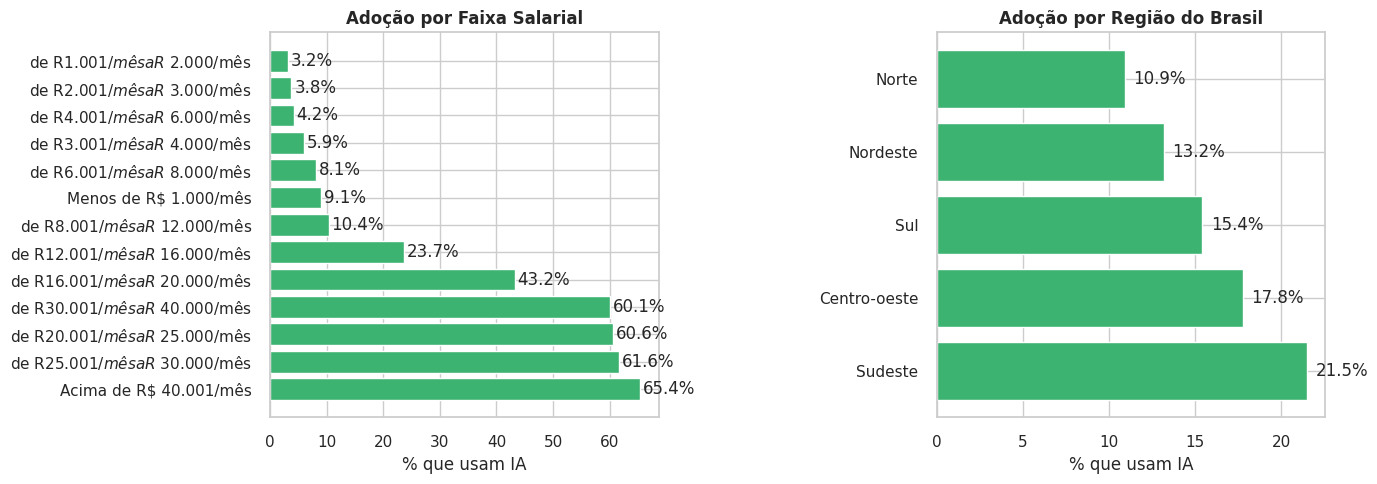

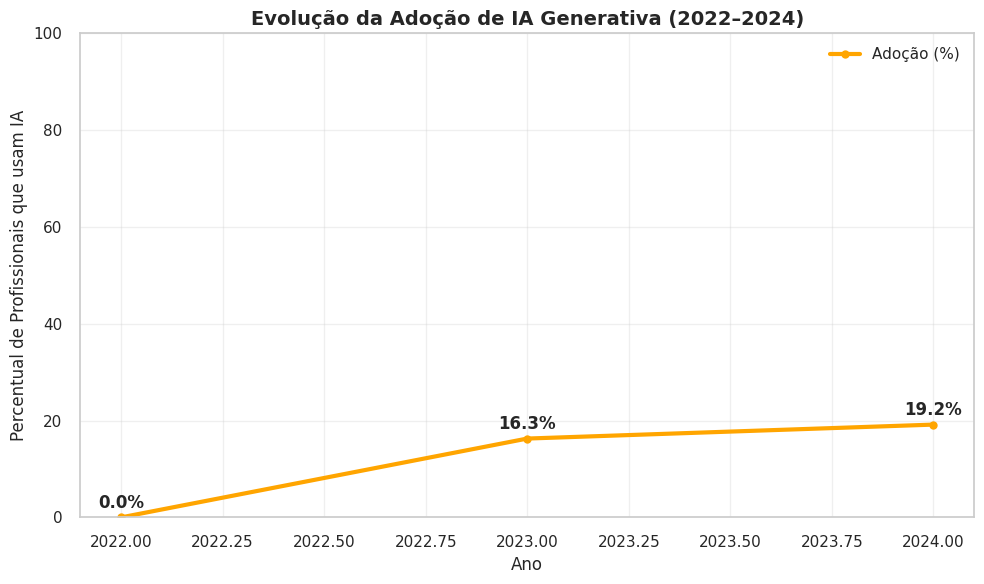

In [25]:
def plot_taxa_uso(df, col, titulo, ax, remove_nao_informado=True):
    df_temp = df[[col, 'usa_ia_generativa']].dropna()

    if remove_nao_informado:
        df_temp = df_temp[df_temp[col] != 'Não informado']

    taxa = df_temp.groupby(col)['usa_ia_generativa'].mean().sort_values(ascending=False) * 100
    taxa = taxa[taxa > 0]

    if taxa.empty:
        return False  # não plota nada

    bars = ax.barh(taxa.index, taxa.values, color='mediumseagreen')
    ax.set_title(titulo, fontweight='bold')
    ax.set_xlabel('% que usam IA')

    for i, v in enumerate(taxa.values):
        ax.text(v + 0.5, i, f"{v:.1f}%", va='center')

    return True

# --- Gráfico final: compactado e limpo ---
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
plotou = []

plotou.append(plot_taxa_uso(df_2024, 'nivel_experiencia_agg', 'Adoção por Nível de Experiência', axs[0]))
plotou.append(plot_taxa_uso(df_2024, '2_h_faixa_salarial', 'Adoção por Faixa Salarial', axs[1]))
plotou.append(plot_taxa_uso(df_2024, 'regiao_brasil', 'Adoção por Região do Brasil', axs[2]))

# Se algum gráfico não foi plotado, esconde o eixo correspondente
for i, ok in enumerate(plotou):
    if not ok:
        axs[i].set_visible(False)

plt.tight_layout()
plt.show()

# Taxas manuais ou calculadas
anos = [2022, 2023, 2024]
taxas_ia = []

for df in [df_2022, df_2023, df_2024]:
    if 'usa_ia_generativa' in df.columns:
        taxa = df['usa_ia_generativa'].mean() * 100
    else:
        taxa = 0
    taxas_ia.append(taxa)

# Estilo
plt.figure(figsize=(10, 6))
plt.plot(anos, taxas_ia, marker='o', color='orange', linewidth=3, label='Adoção (%)')

# Anotações com os valores percentuais
for x, y in zip(anos, taxas_ia):
    plt.text(x, y + 2, f"{y:.1f}%", ha='center', fontweight='bold')

# Eixos e título
plt.ylim(0, 100)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Percentual de Profissionais que usam IA", fontsize=12)
plt.title("Evolução da Adoção de IA Generativa (2022–2024)", fontsize=14, fontweight='bold')

# Legenda e grade
plt.legend(loc='upper right')
plt.grid(alpha=0.3)

# Exibir
plt.tight_layout()
plt.show()